In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("https://www.stat4decision.com/wine_data.csv", index_col = 0)
data["type"].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [4]:
y = data["type"]
x = data.drop("type", axis = 1)
x_train, x_test, y_train, y_test  = train_test_split(x, 
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=42)

In [5]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [6]:
modele_rf.fit(x_train, y_train)

RandomForestClassifier()

In [7]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
total sulfur dioxide,0.339373
chlorides,0.264585
volatile acidity,0.094450
fixed acidity,0.057135
density,0.053045
sulphates,0.051011
free sulfur dioxide,0.046883
residual sugar,0.044770
pH,0.020123
citric acid,0.017912


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Le pourcentage de bien classés est de : {accuracy_score(y_test, modele_rf.predict(x_test))*100} %")

Le pourcentage de bien classés est de : 99.6923076923077 %


In [9]:
pd.DataFrame(confusion_matrix(y_test, modele_rf.predict(x_test)),
             index = ["blanc_données", "rouge_données"],
             columns = ["blanc_predit", "rouge_predit"])

,blanc_predit,rouge_predit
blanc_données,1239,0
rouge_données,5,381


In [10]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999


True

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

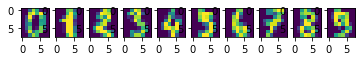

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [14]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [15]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6891223733003708


In [16]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8111111111111111
0.8444444444444444
0.9
0.8666666666666667
0.9444444444444444
0.8333333333333334
0.8777777777777778
0.8888888888888888
0.8333333333333334
0.8444444444444444
0.9111111111111111
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.7888888888888889
0.8777777777777778
0.8888888888888888
0.8888888888888888
0.8111111111111111
0.8666666666666667
0.8555555555555555
0.8555555555555555
0.8666666666666667
0.8666666666666667
0.8111111111111111
0.8666666666666667
0.8111111111111111
0.8888888888888888
0.8888888888888888
0.8444444444444444
0.8888888888888888
0.9
0.9111111111111111
0.8555555555555555
0.8444444444444444
0.8555555555555555
0.8666666666666667
0.8666666666666667
0.8555555555555555
0.8
0.8555555555555555
0.8666666666666667
0.7888888888888889
0.8777777777777778
0.8333333333333334
0.8555555555555555
0.9
0.8111111111111111
0.8666666666666667
0.8222222222222222
0.8222222222222222
0.9
0.8111111111111111
0.8888888888888888
0.8666666666666667
0.8333333333333334
0.8
0.8
0.8

In [17]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [18]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

In [19]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.9555555555555556
0.9444444444444444
0.9777777777777777
0.9777777777777777


KeyboardInterrupt: 

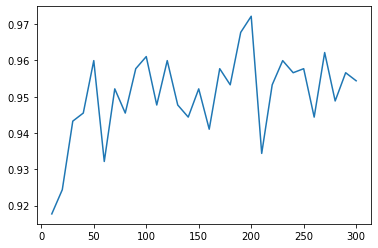

In [22]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.6, max_features=0.8, n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [21]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.9310344827586207
max_samples: 0.8
max_features: 0.6


In [23]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.8850432632880099


In [26]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6718170580964153
Bagging (200 arbres) : 0.8819530284301607
Forêt aléatoire (200 arbres) : 0.8899876390605687


In [27]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9339265850945495 0.0066592345037133635
0.9567296996662957 0.004377901814049914


10 0.932146829810901
20 0.9566184649610678
30 0.9655172413793104
40 0.9588431590656284
50 0.967741935483871
60 0.967741935483871
70 0.9655172413793104
80 0.9666295884315906
90 0.9688542825361512
100 0.9699666295884316
110 0.9688542825361512
120 0.9710789766407119
130 0.96440489432703
140 0.967741935483871
150 0.9699666295884316
160 0.967741935483871
170 0.96440489432703
180 0.967741935483871
190 0.9699666295884316
200 0.9688542825361512
210 0.9688542825361512
220 0.9688542825361512
230 0.9733036707452726
240 0.9666295884315906
250 0.967741935483871
260 0.9699666295884316
270 0.9688542825361512
280 0.9655172413793104
290 0.9688542825361512
300 0.9688542825361512


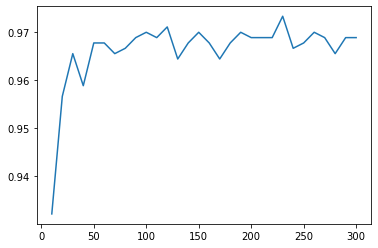

In [28]:
N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)

clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))

clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.96440489432703
Extra Trees : 0.9699666295884316


In [30]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9171817058096415
